# Clusteranalysis
## Imports

In [33]:
from __future__ import division

import pandas as pd
import numpy as np

from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from functions import (build_word_vector_matrix,
                       silhouette_analysis)

import matplotlib.pyplot as plt

### Load suggestion terms

In [51]:
with open('./suggestion_terms_prep.txt', 'r', encoding='utf-8') as f:
    suggestions = [term[:-1] for term in f.readlines()]

## Cluster Analysis

### Load GloVe Embeddings and get vectors for suggestion terms

In [38]:
glove_model = KeyedVectors.load_word2vec_format("../dis25-2021/glove.6B.100d.w2vformat.txt6",binary=False)

In [52]:
suggestions = [term for term in suggestions if term in glove_model.index_to_key]
suggestion_terms_vectors = [glove_model.get_vector(term) for term in suggestions]

In [65]:
len(suggestions)

2041

### Perform Silhouette Analysis to find the optimal number of clusters

For n_clusters = 2 The average silhouette_score is : 0.19149493
For n_clusters = 3 The average silhouette_score is : 0.093428835
For n_clusters = 4 The average silhouette_score is : 0.007086592
For n_clusters = 5 The average silhouette_score is : 0.013472588
For n_clusters = 6 The average silhouette_score is : 0.017599462
For n_clusters = 7 The average silhouette_score is : -0.00075330335
For n_clusters = 8 The average silhouette_score is : 0.0012633319
For n_clusters = 9 The average silhouette_score is : -0.0030419107
For n_clusters = 10 The average silhouette_score is : 7.459803e-05
For n_clusters = 11 The average silhouette_score is : 5.971375e-05
For n_clusters = 12 The average silhouette_score is : -0.0047774897
For n_clusters = 13 The average silhouette_score is : -0.0086568175
For n_clusters = 14 The average silhouette_score is : 0.003108561
For n_clusters = 15 The average silhouette_score is : -0.008840508
For n_clusters = 16 The average silhouette_score is : 0.0057396903
For n

C:\Users\Pia\Documents\dis25\functions.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 22 The average silhouette_score is : -0.0047624307
For n_clusters = 23 The average silhouette_score is : -0.00043756783
For n_clusters = 24 The average silhouette_score is : -0.0014244574
For n_clusters = 25 The average silhouette_score is : -0.0021264427
For n_clusters = 26 The average silhouette_score is : 0.0025336843
For n_clusters = 27 The average silhouette_score is : -0.0017065693
For n_clusters = 28 The average silhouette_score is : -0.010225308
For n_clusters = 29 The average silhouette_score is : -0.0036155144
For n_clusters = 30 The average silhouette_score is : -0.0053596906
For n_clusters = 31 The average silhouette_score is : 0.00023330262
For n_clusters = 32 The average silhouette_score is : -0.0021132247
For n_clusters = 33 The average silhouette_score is : -0.015044491
For n_clusters = 34 The average silhouette_score is : -0.00092879735
For n_clusters = 35 The average silhouette_score is : -0.014617771
For n_clusters = 36 The average silhouette_score i

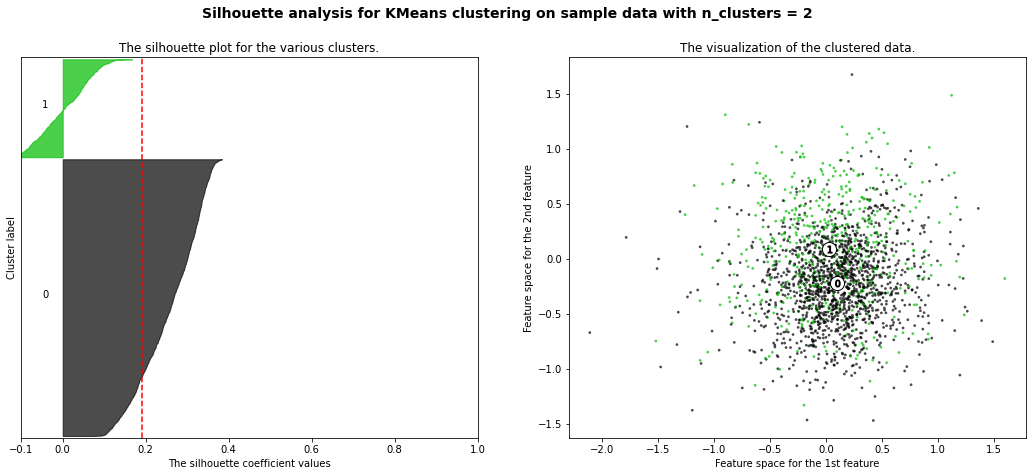

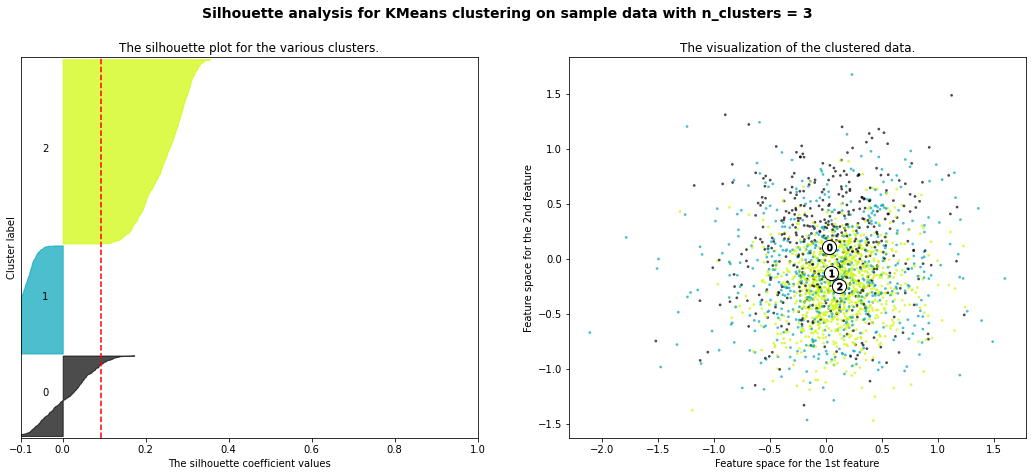

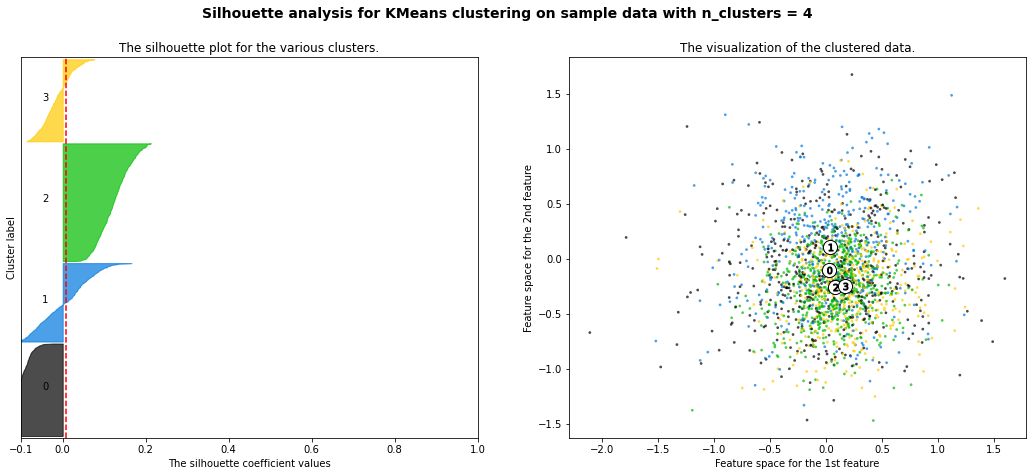

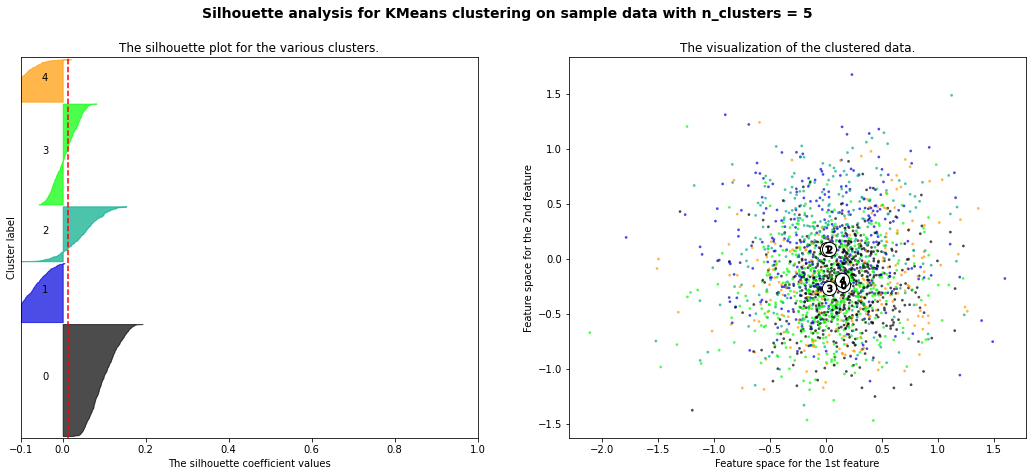

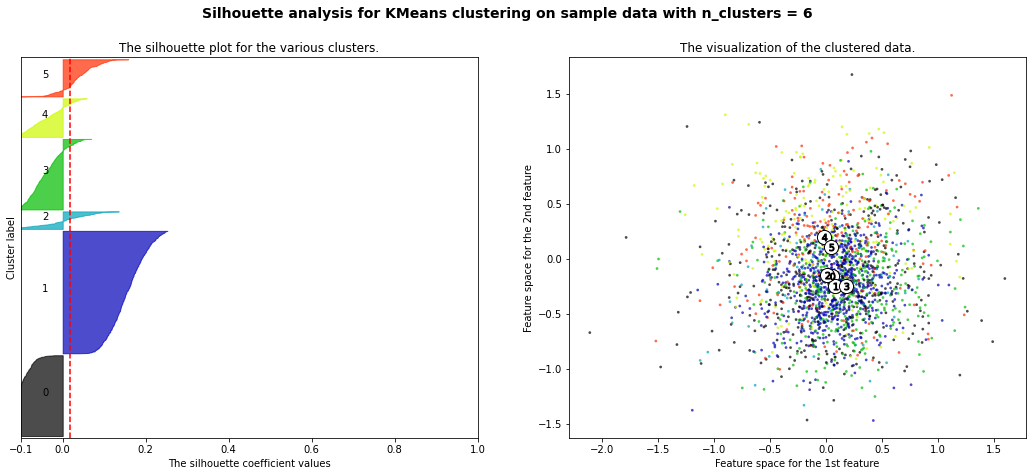

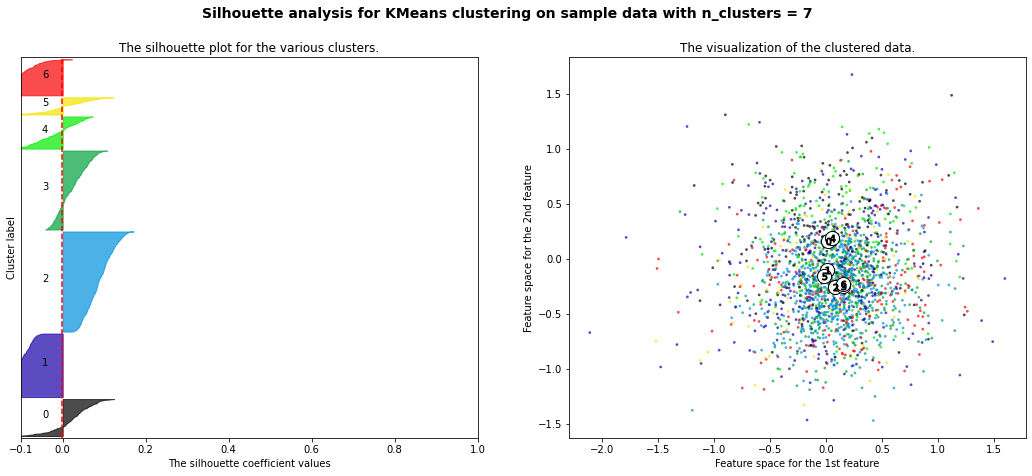

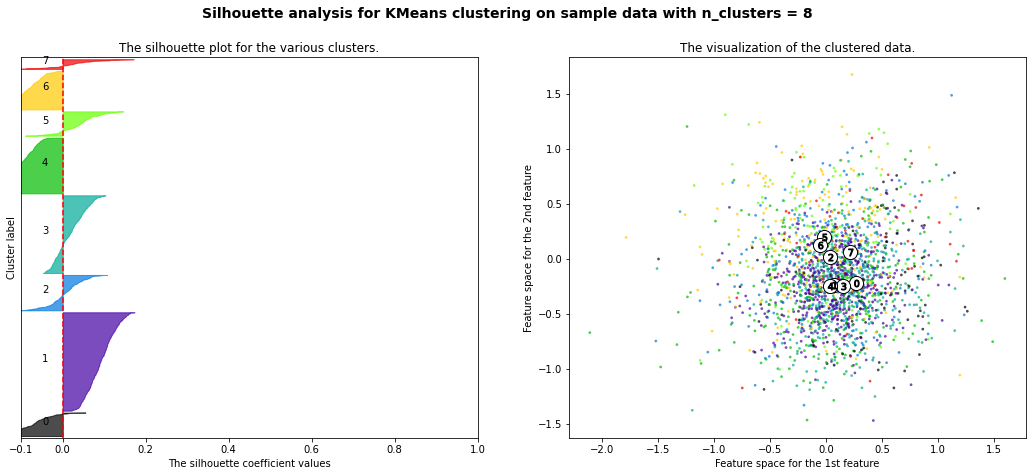

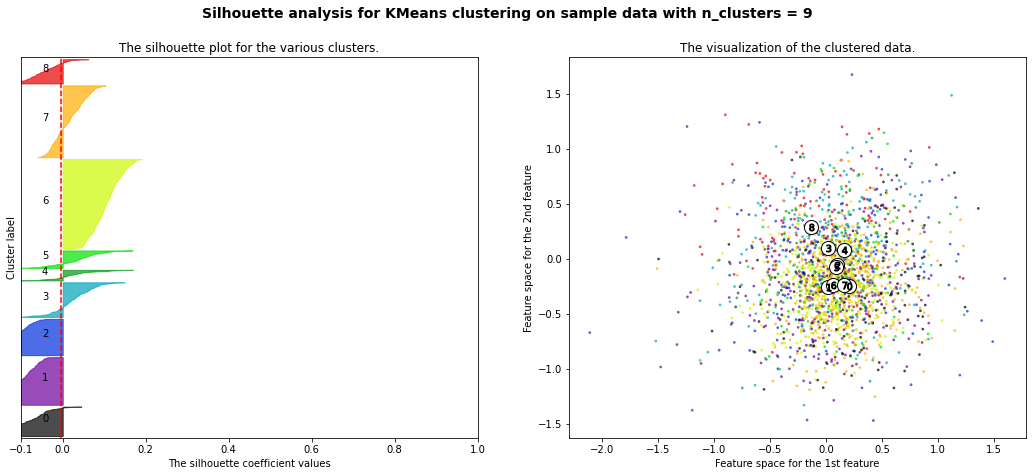

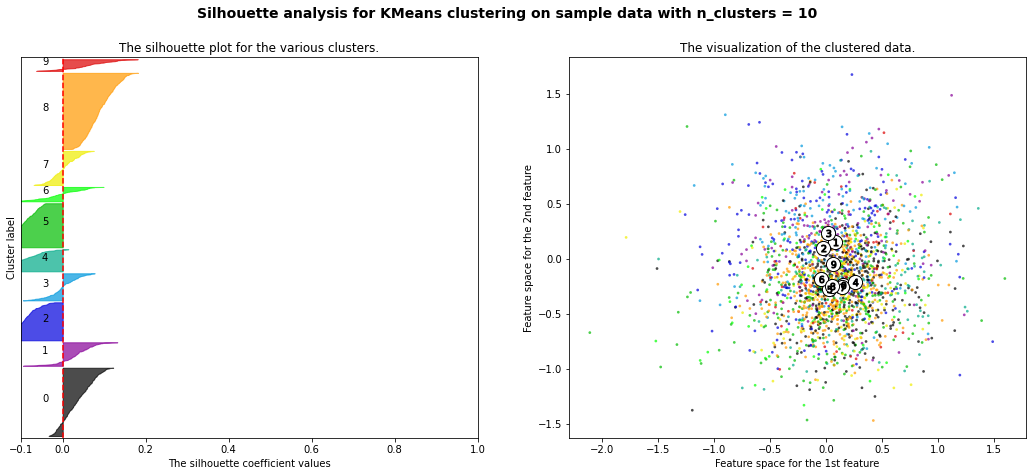

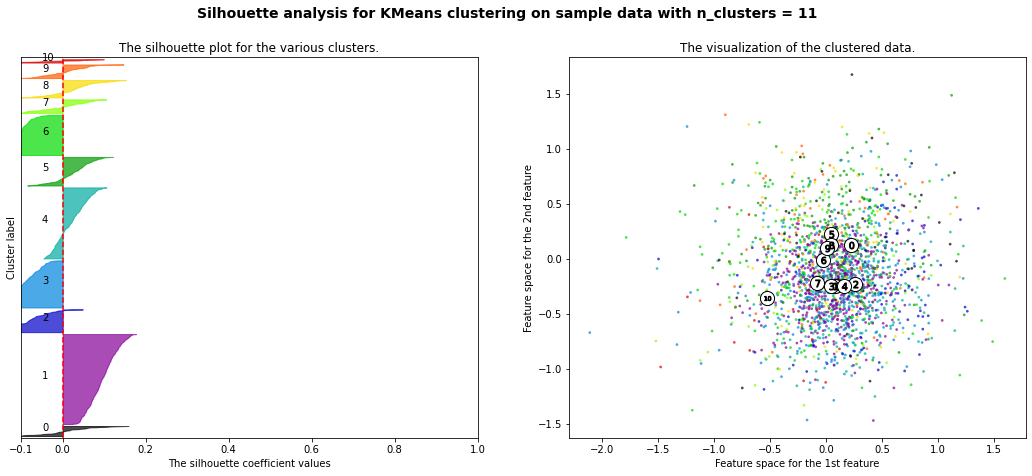

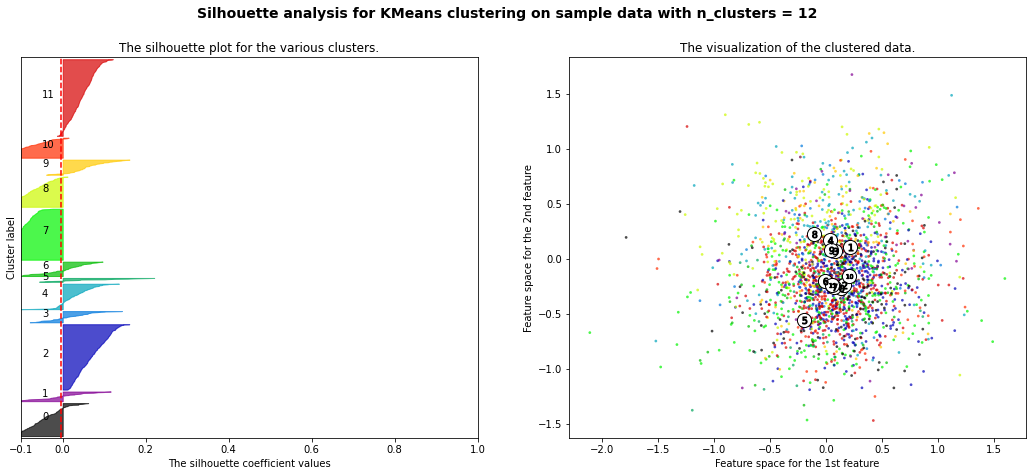

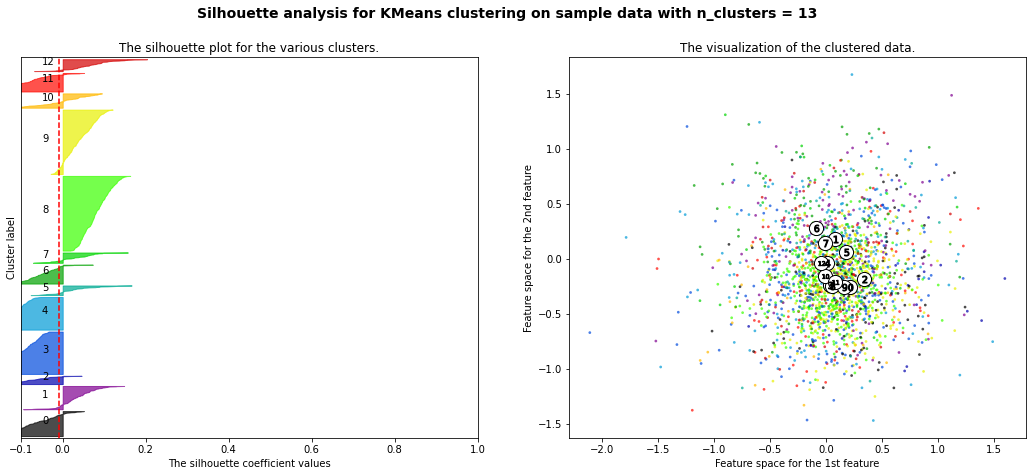

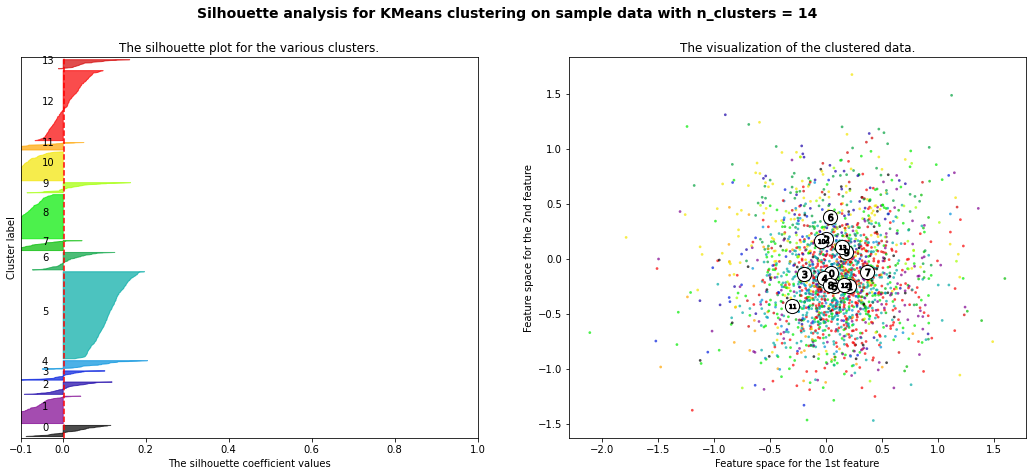

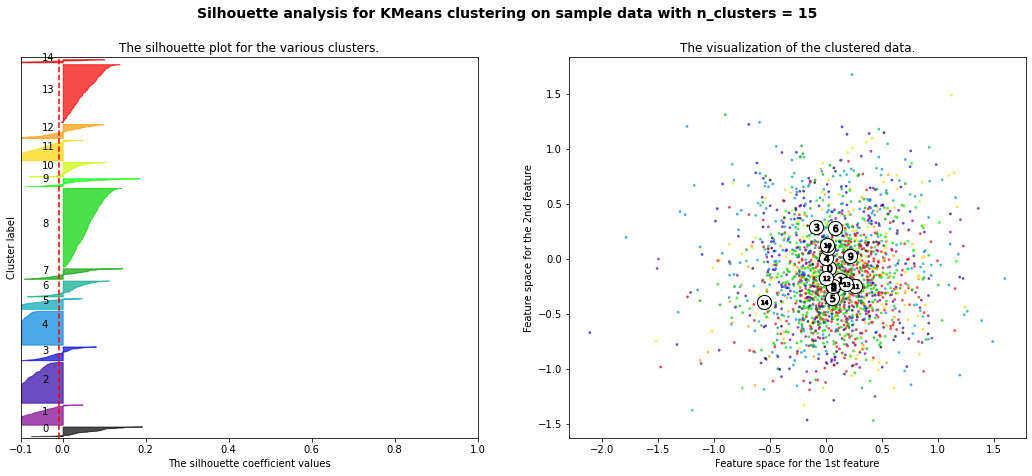

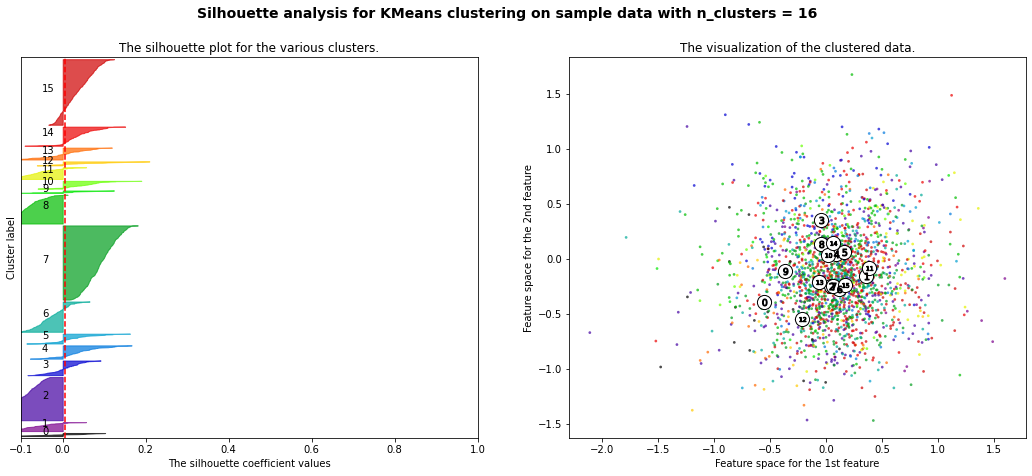

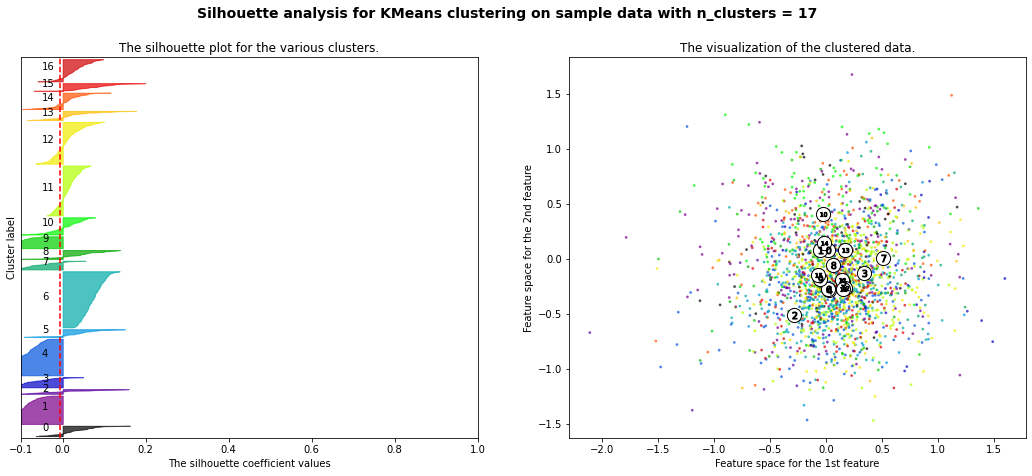

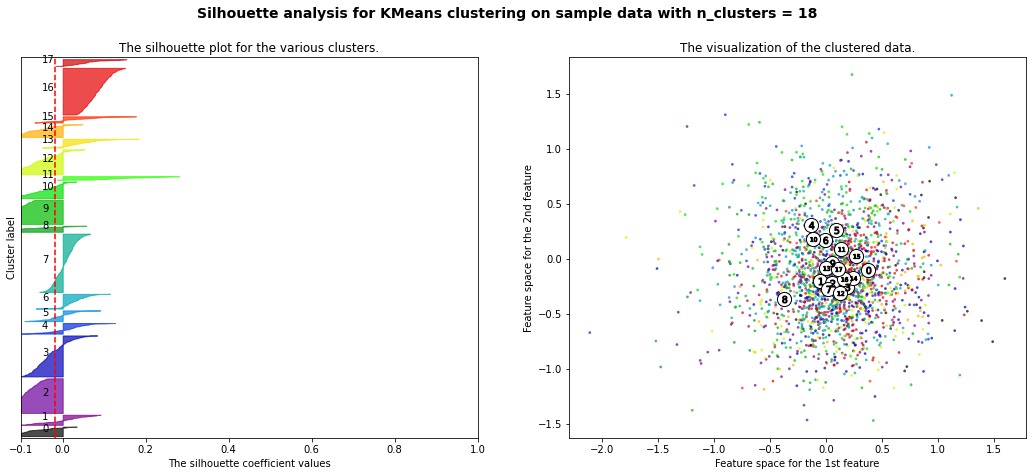

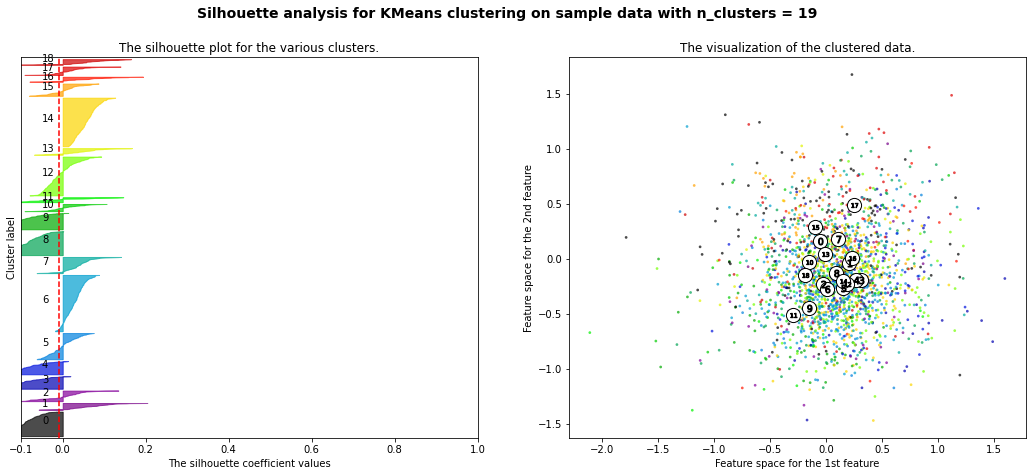

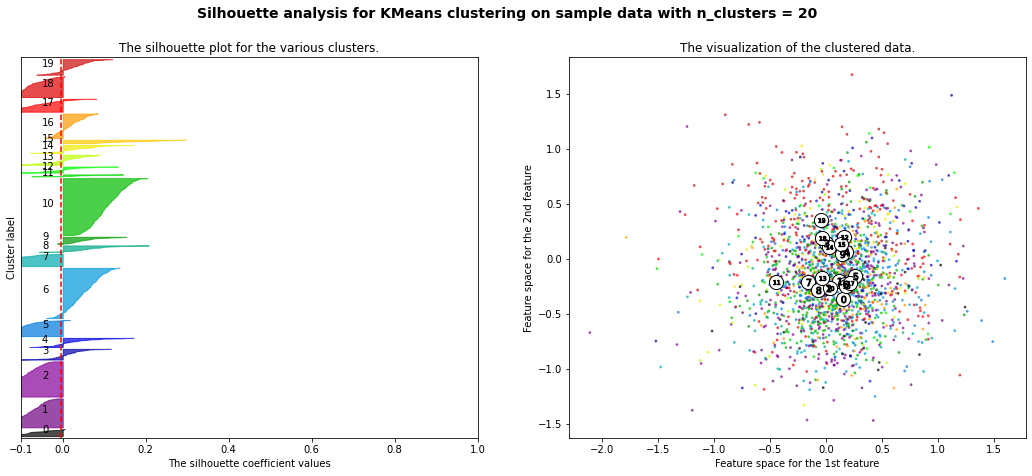

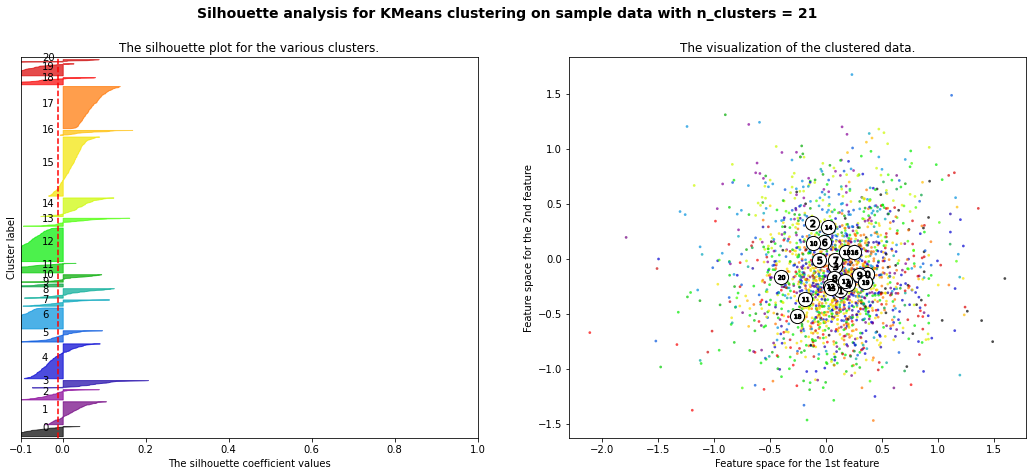

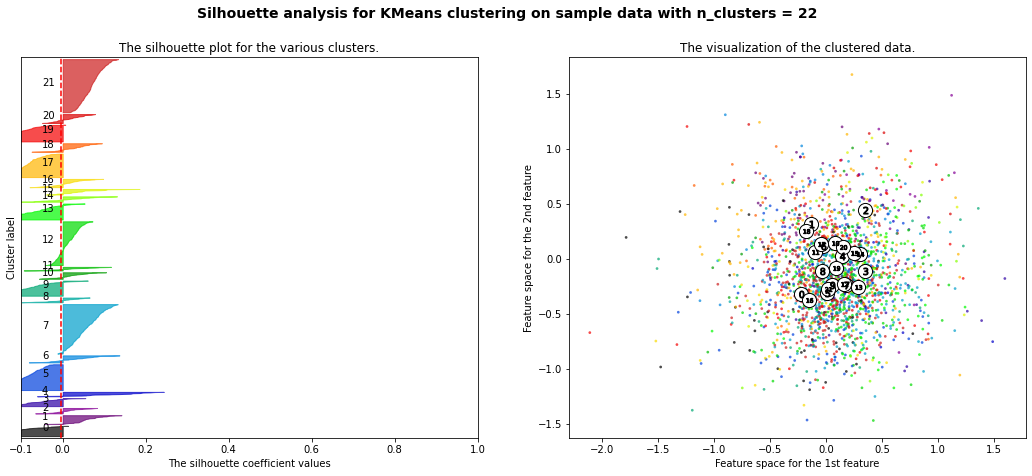

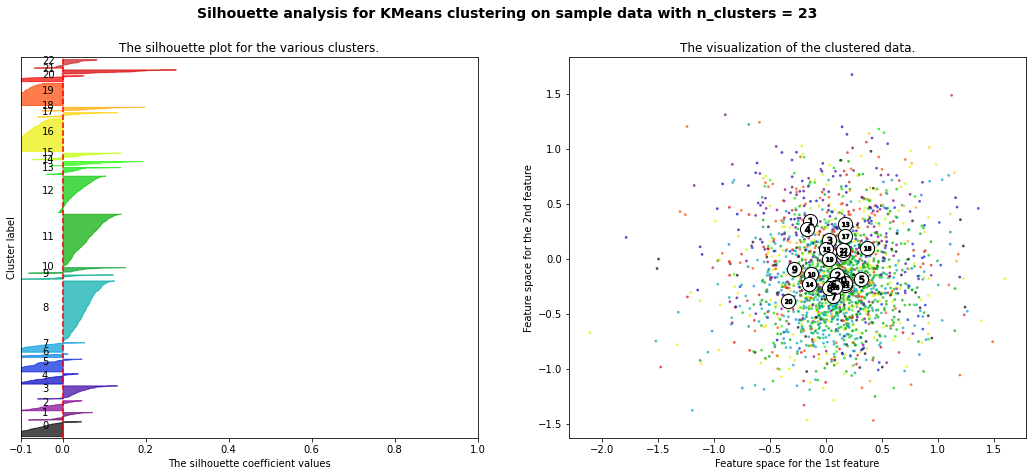

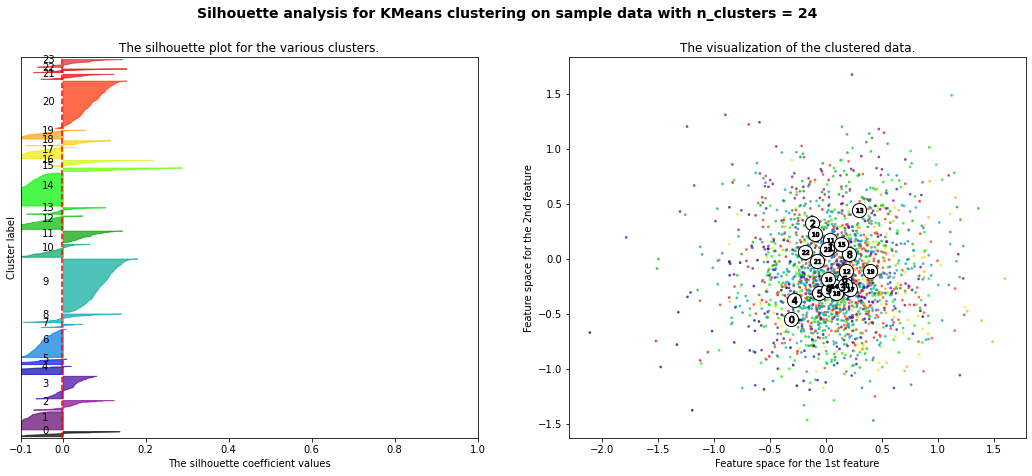

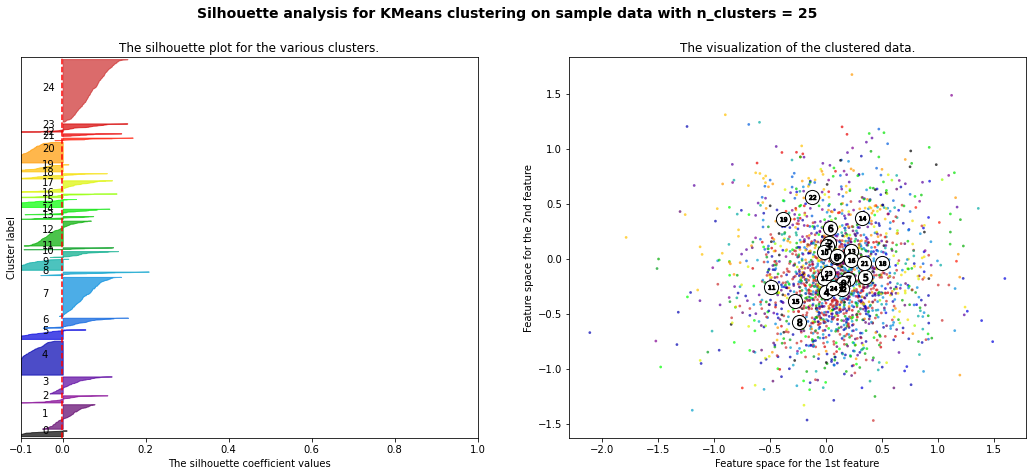

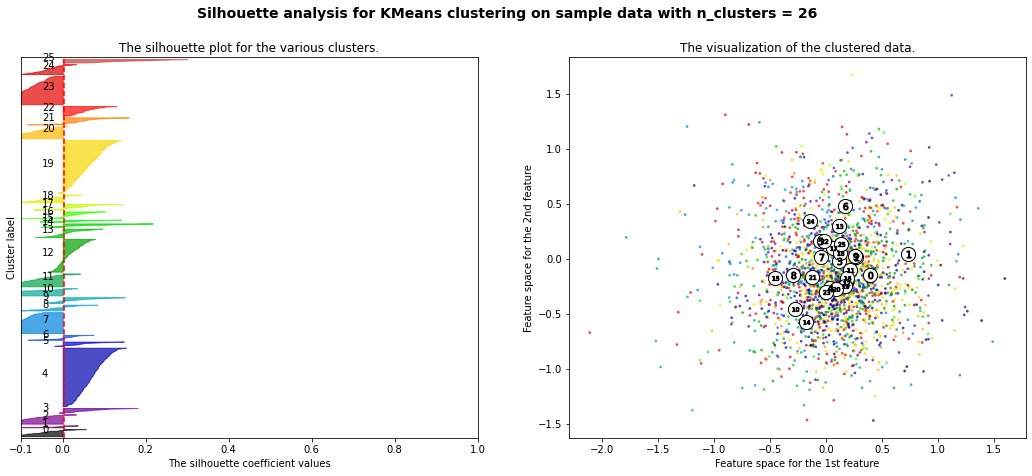

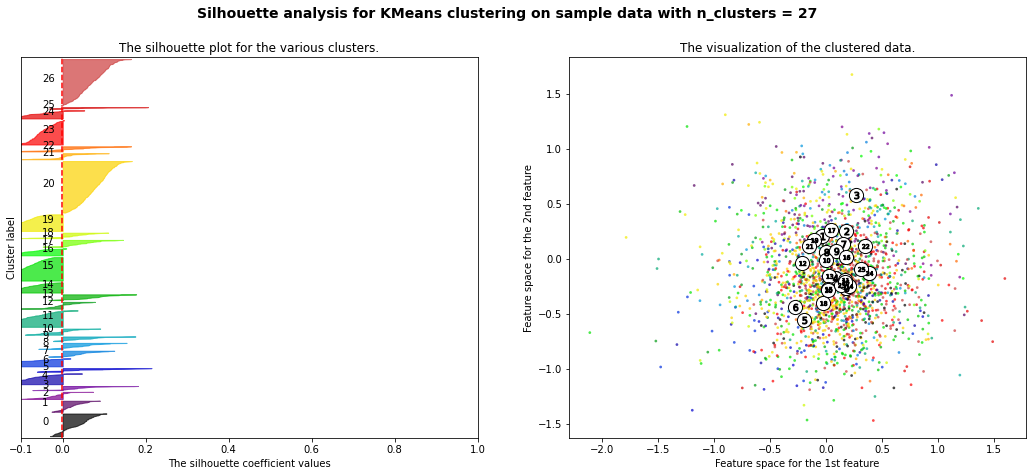

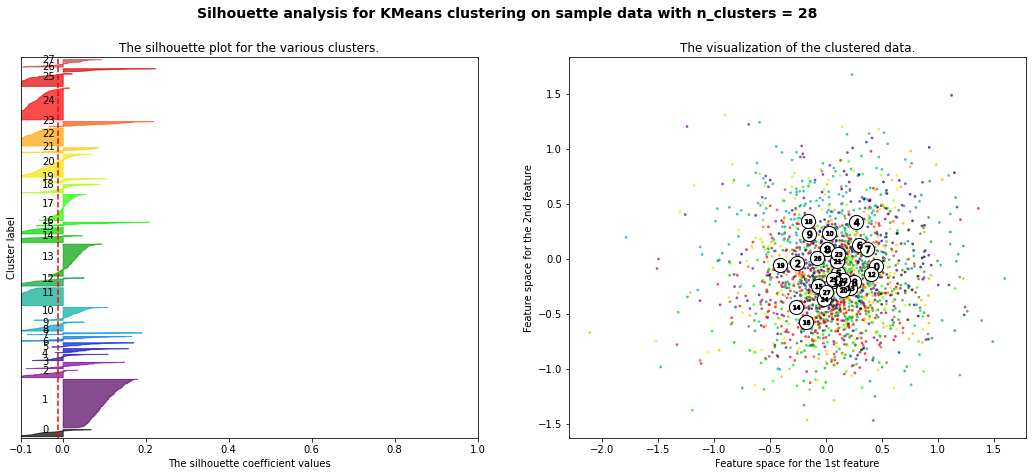

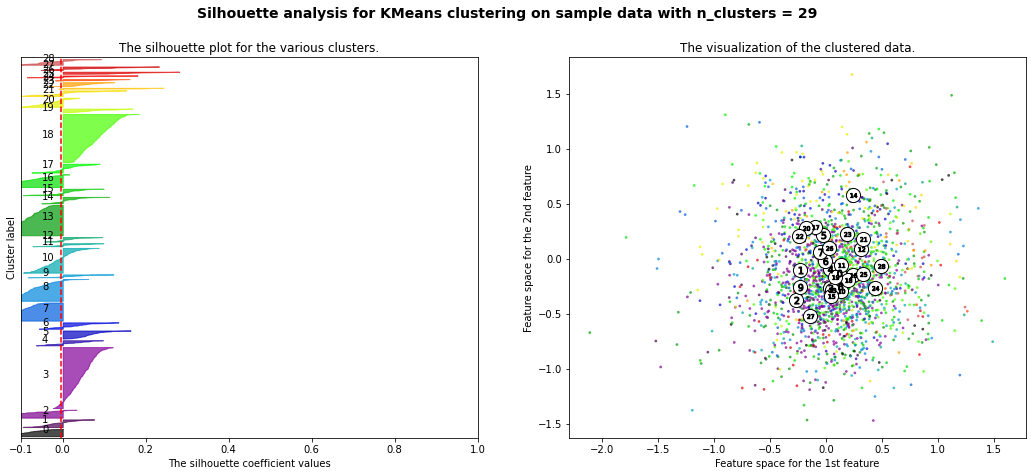

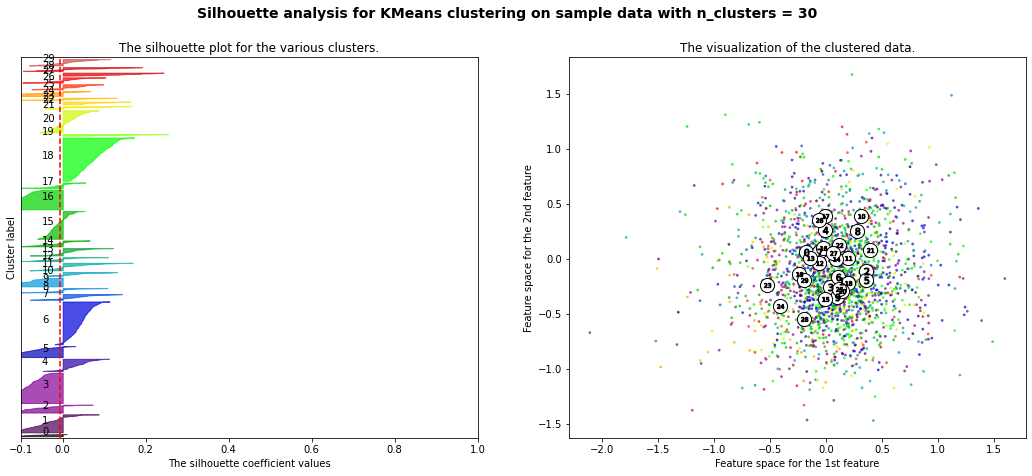

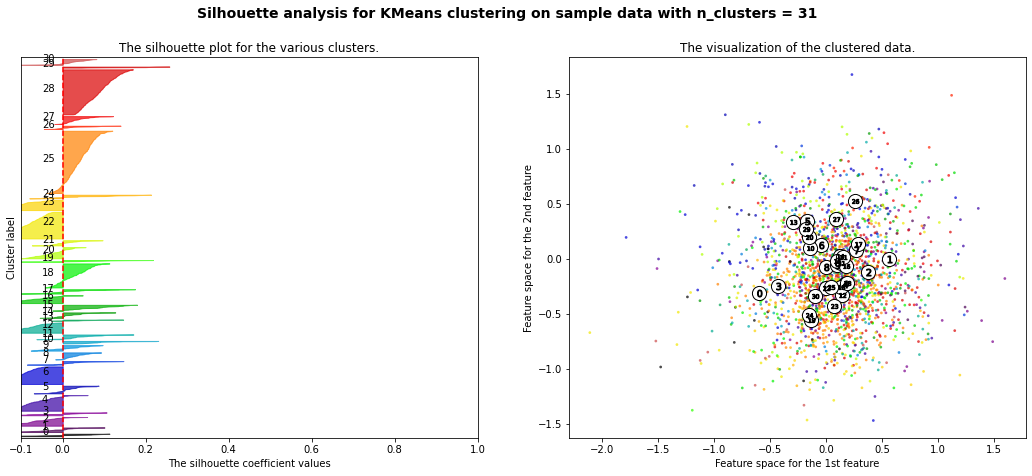

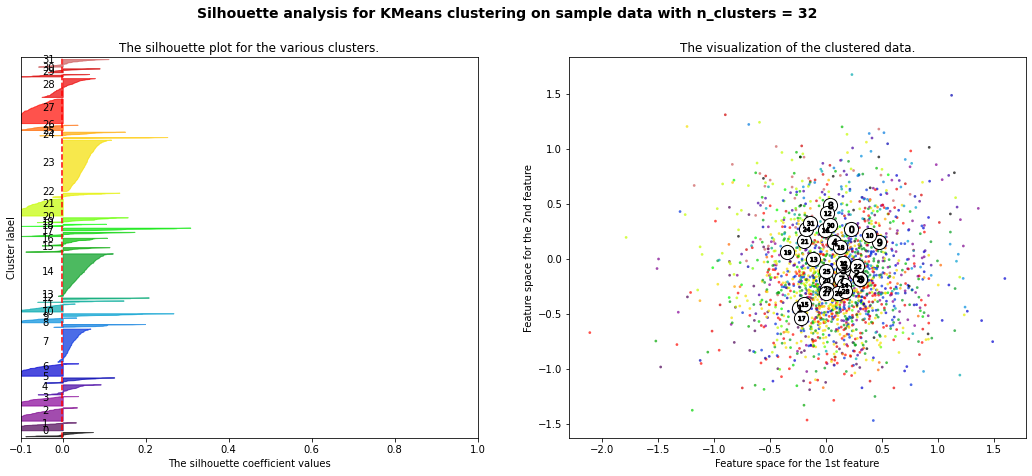

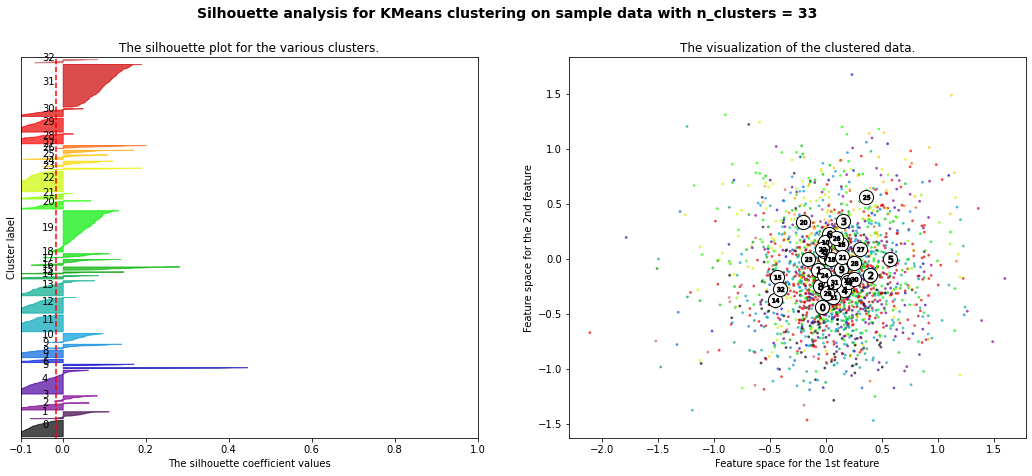

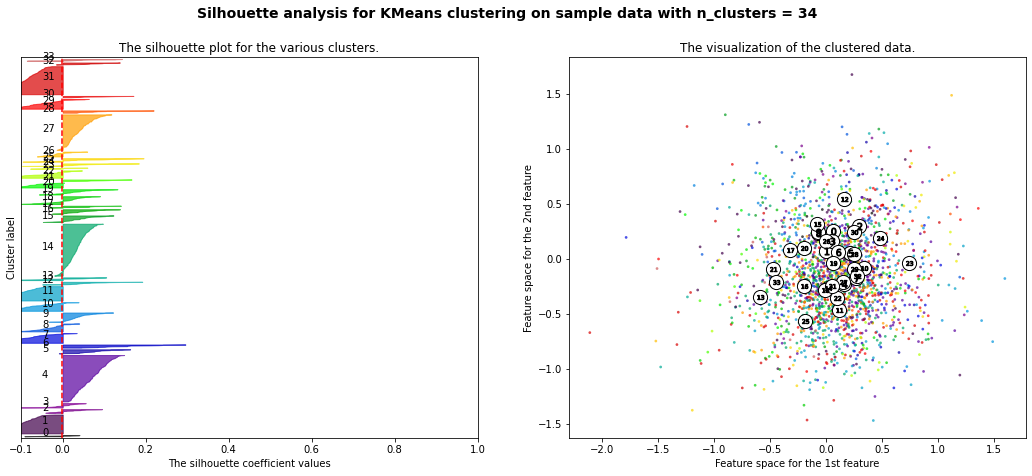

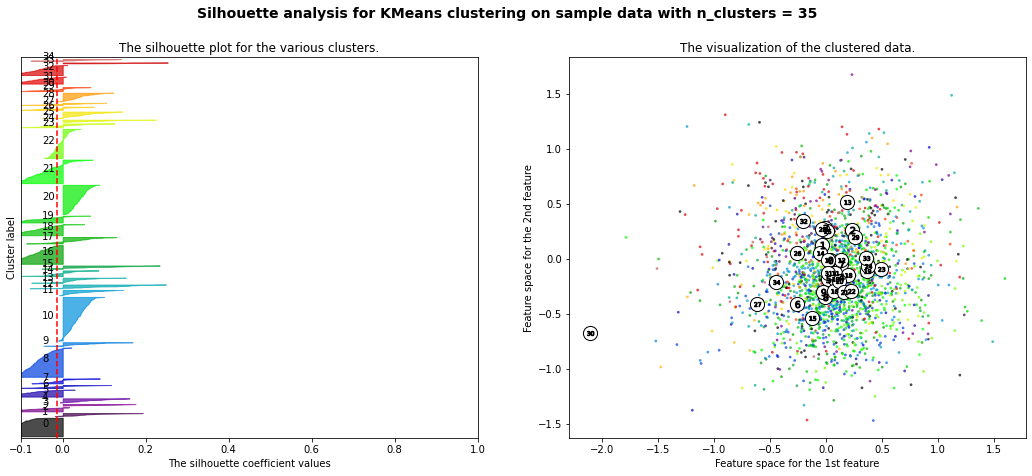

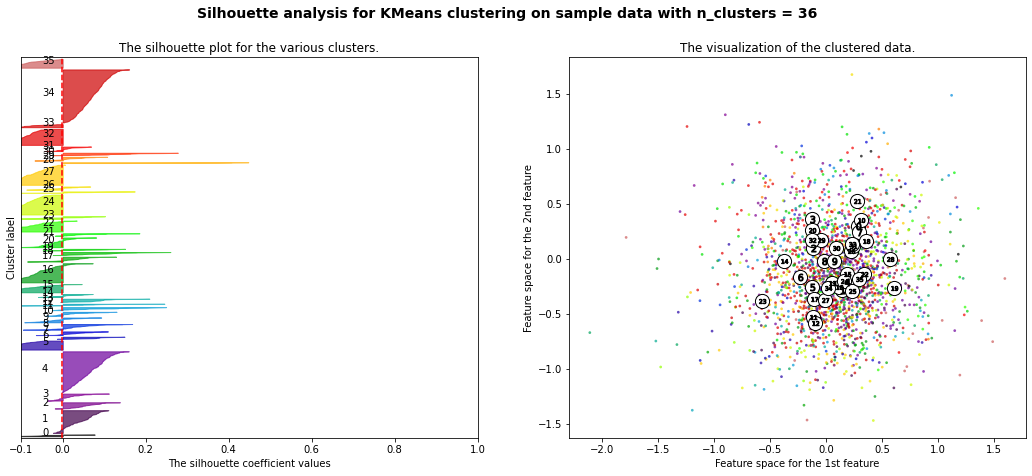

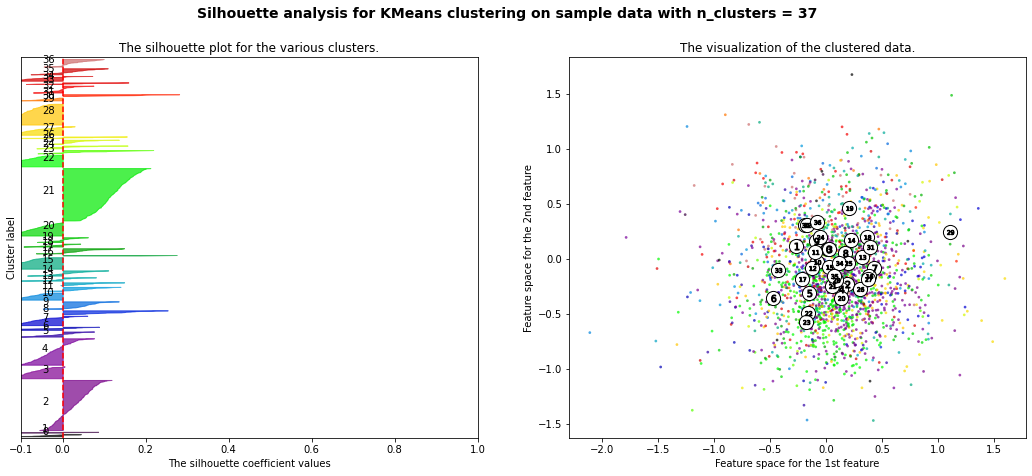

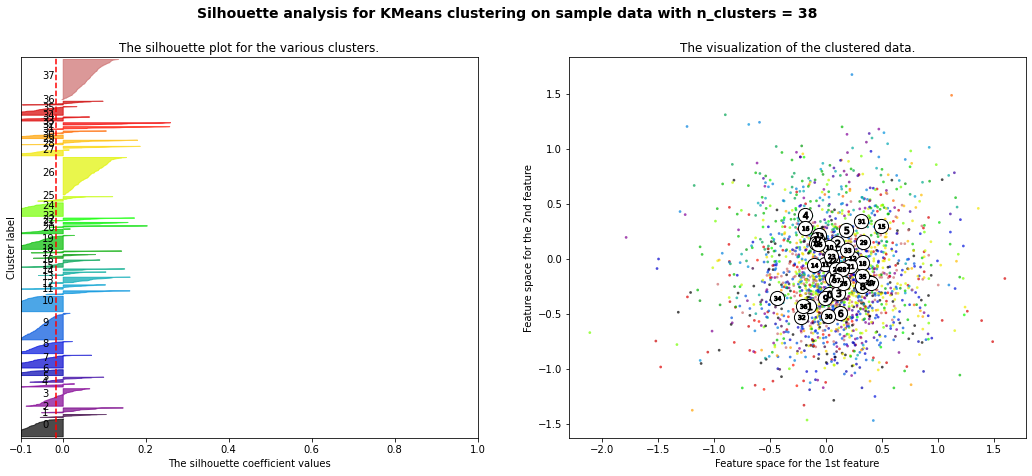

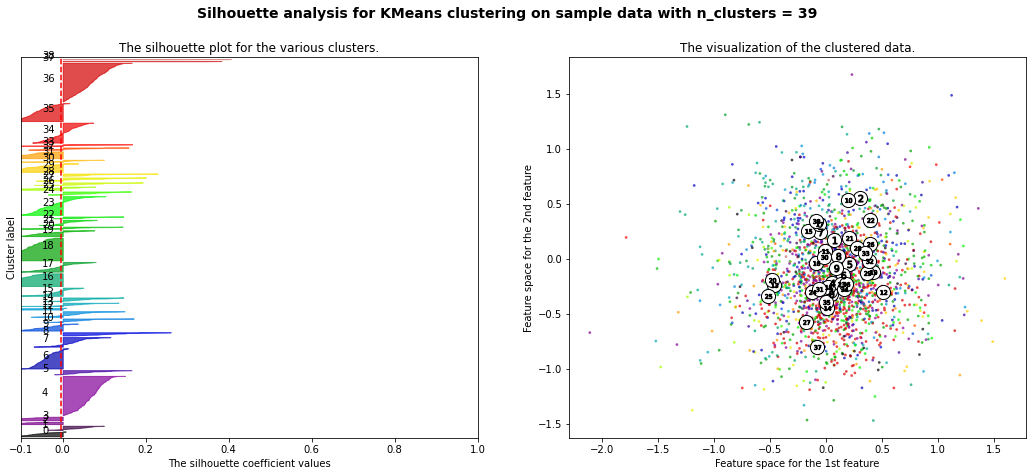

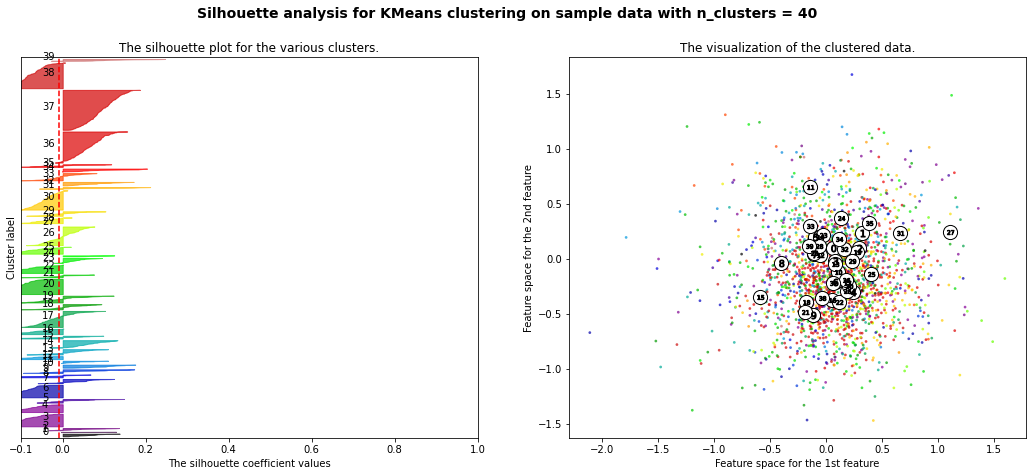

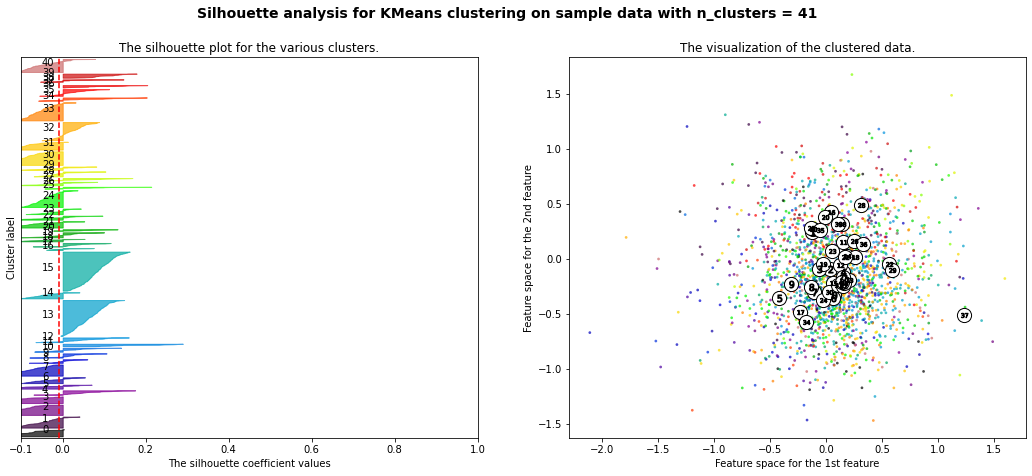

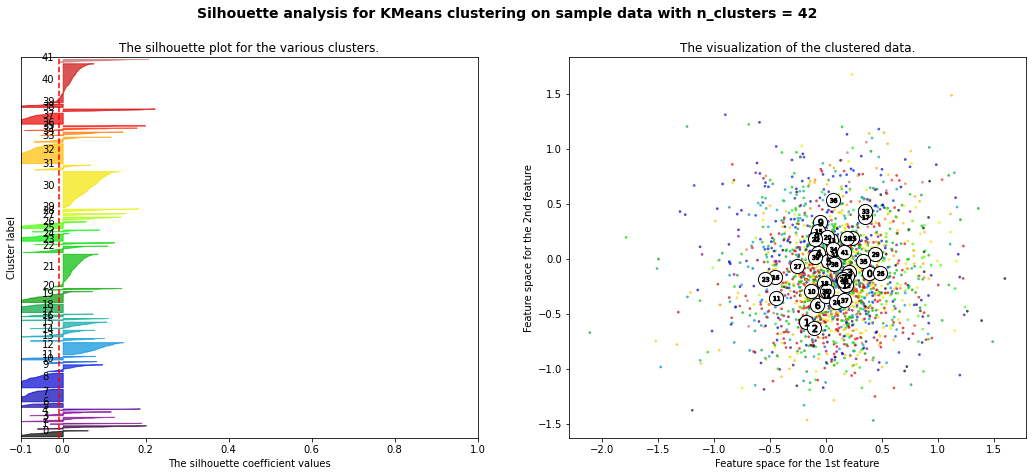

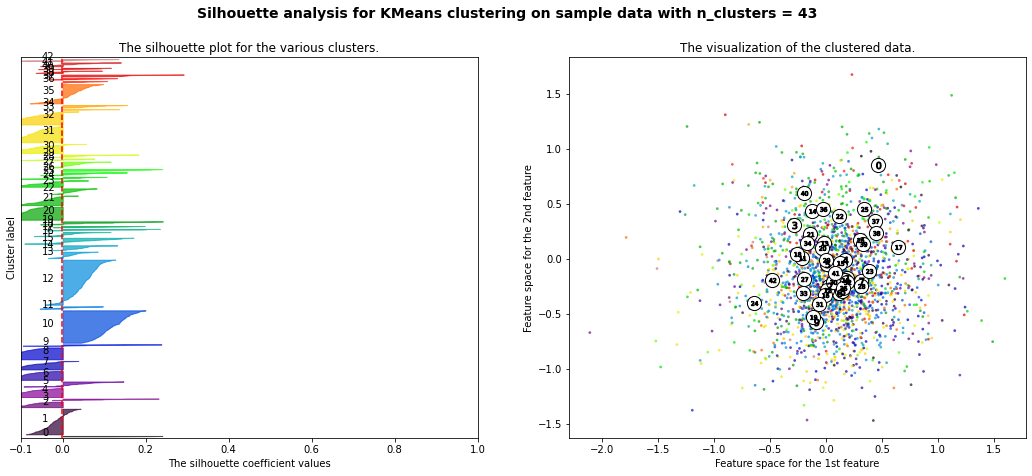

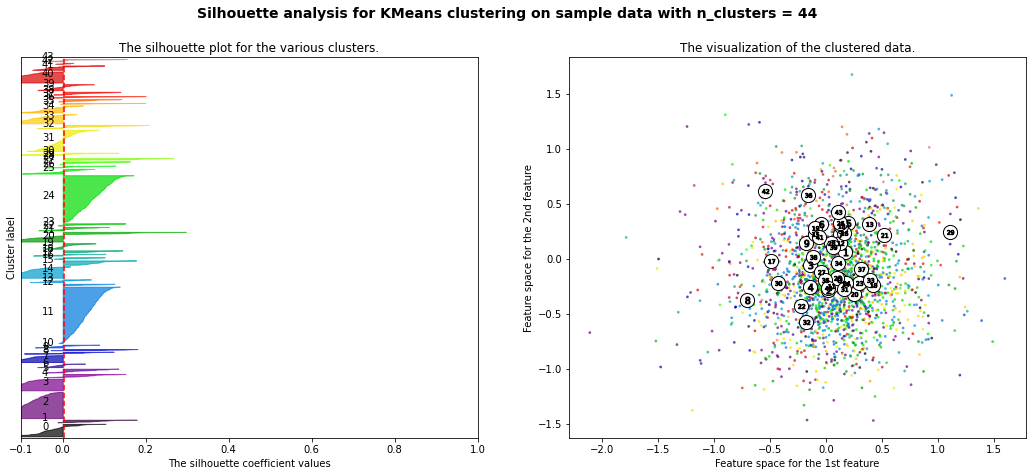

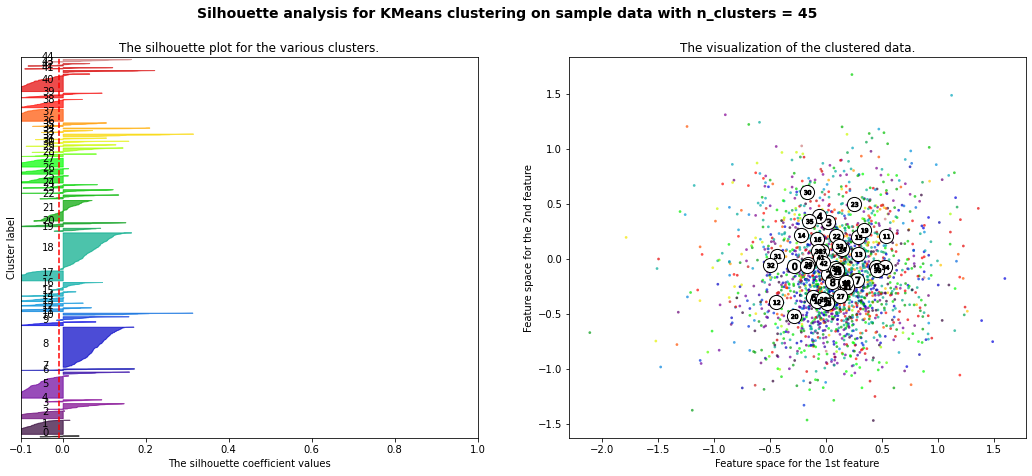

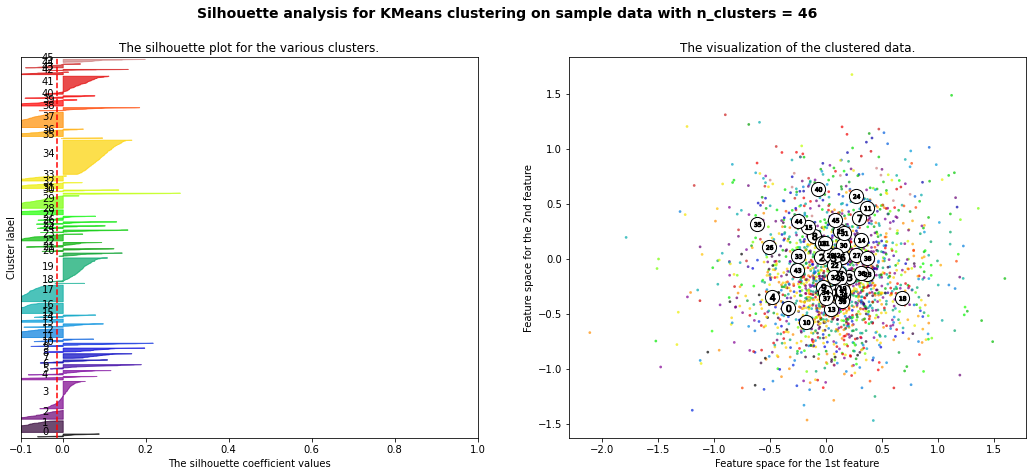

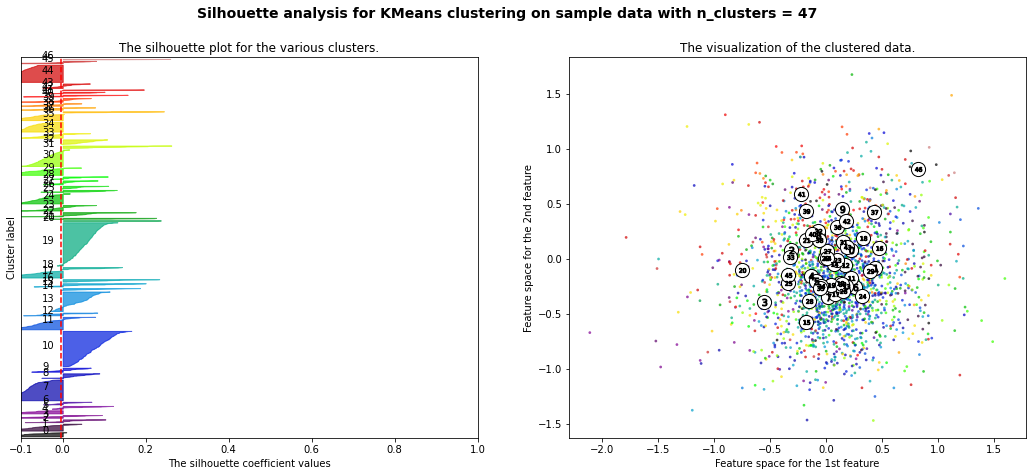

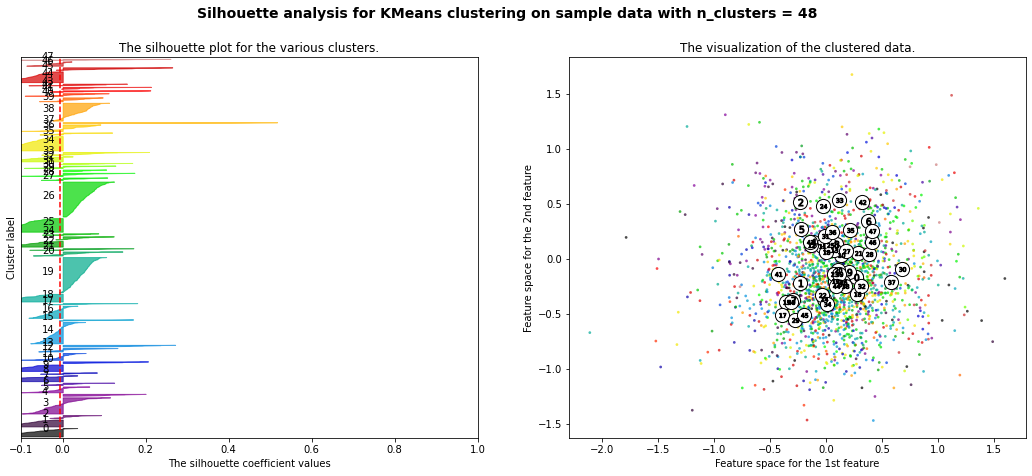

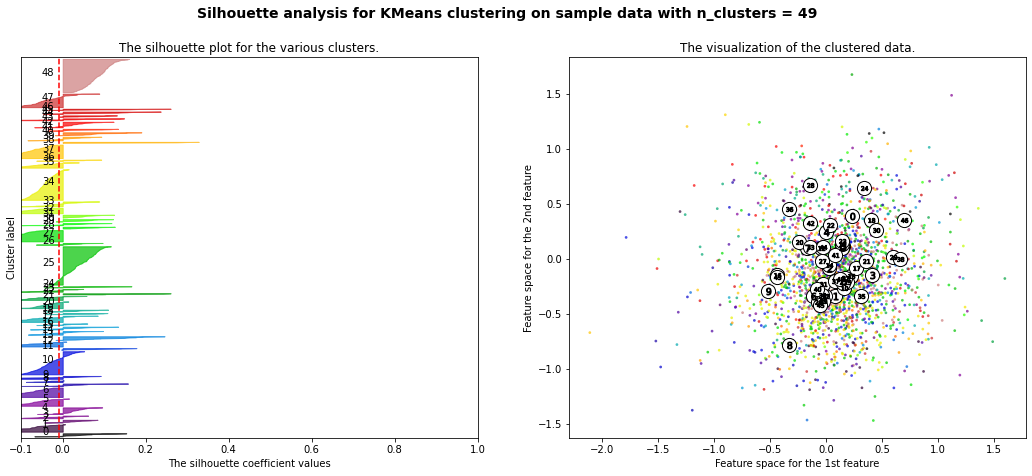

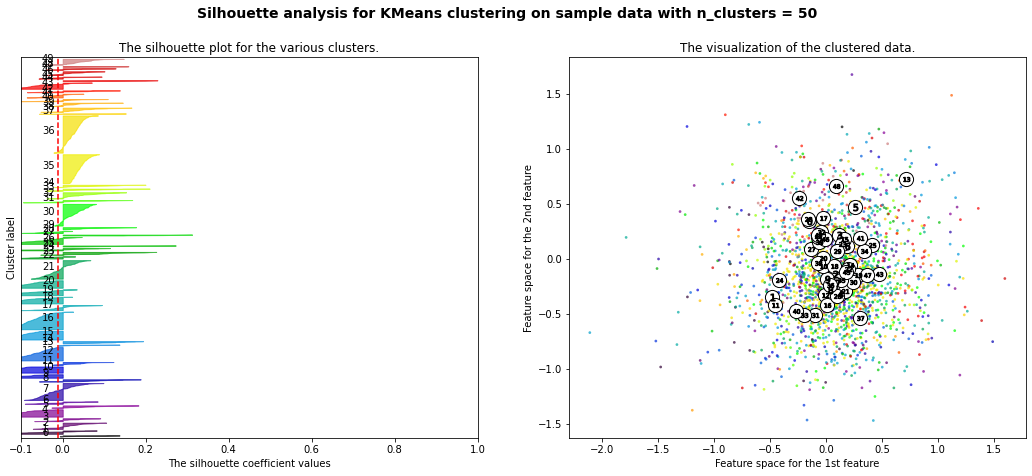

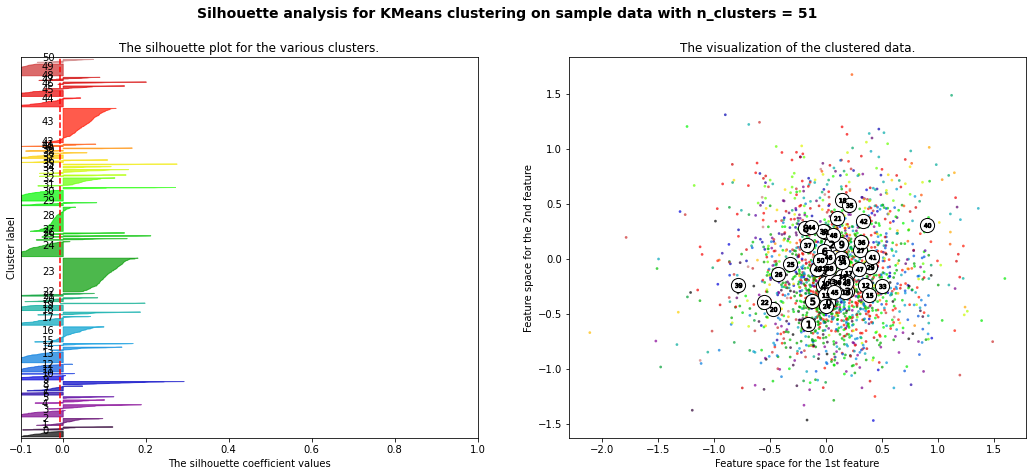

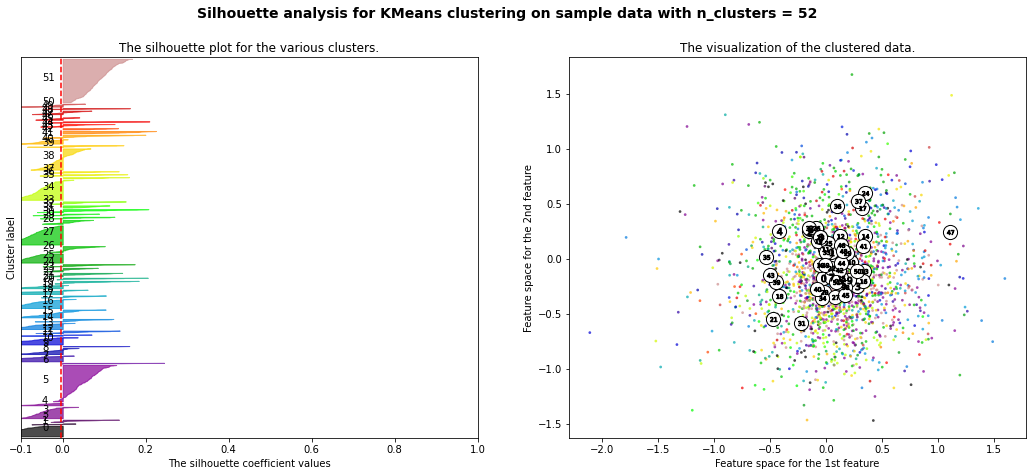

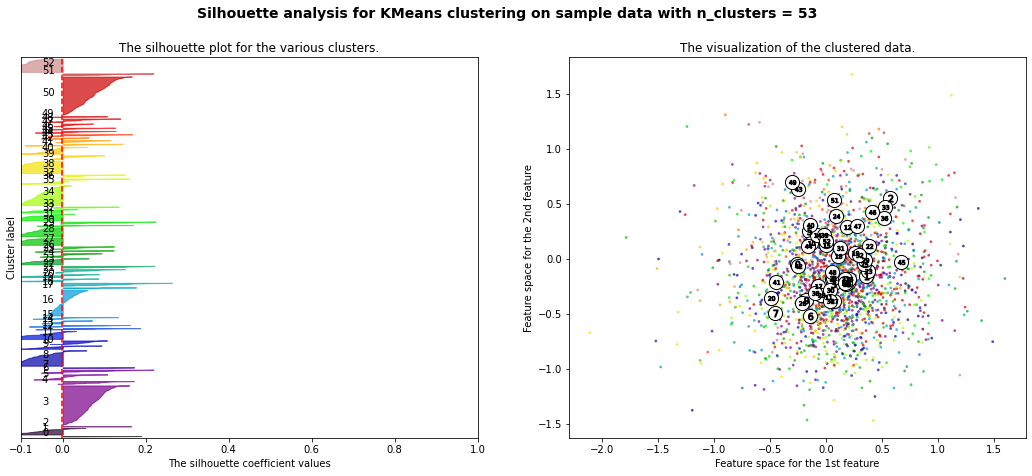

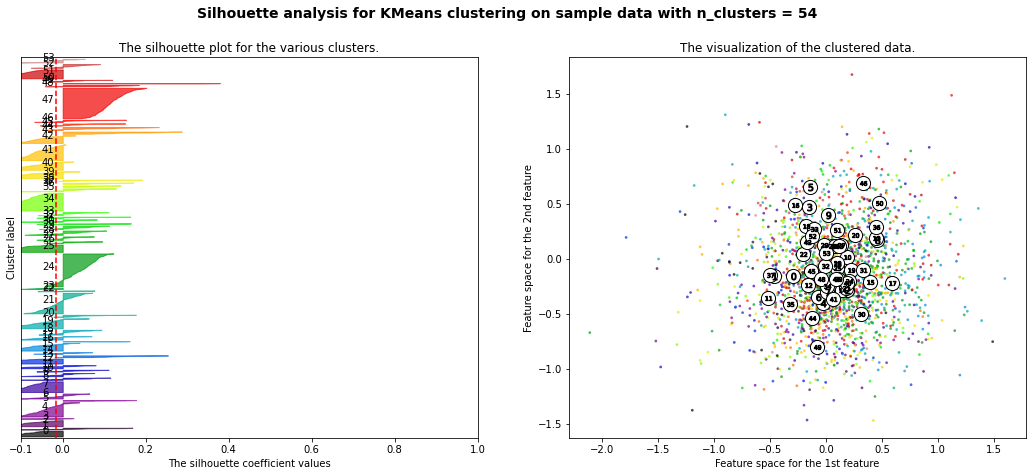

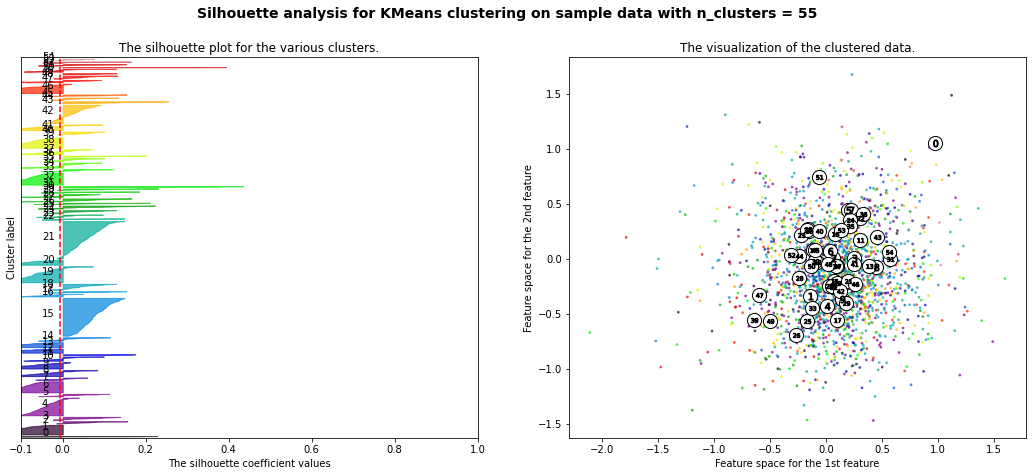

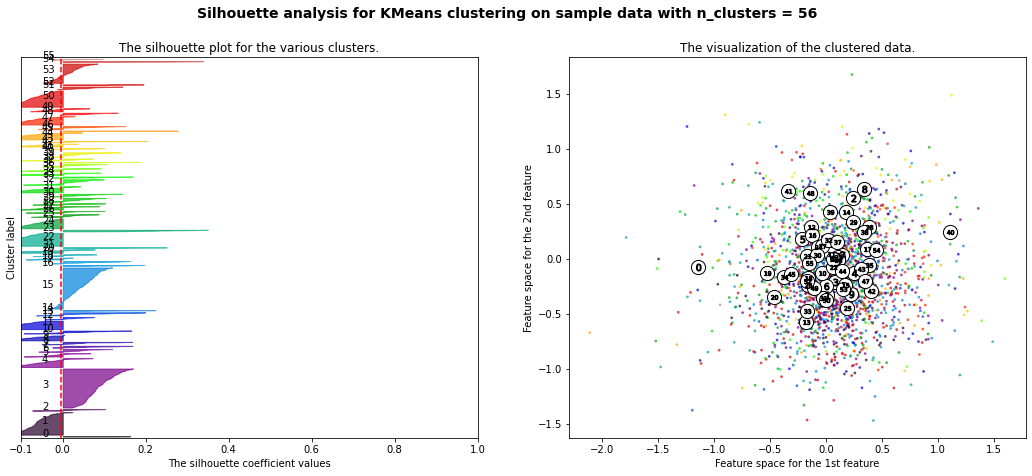

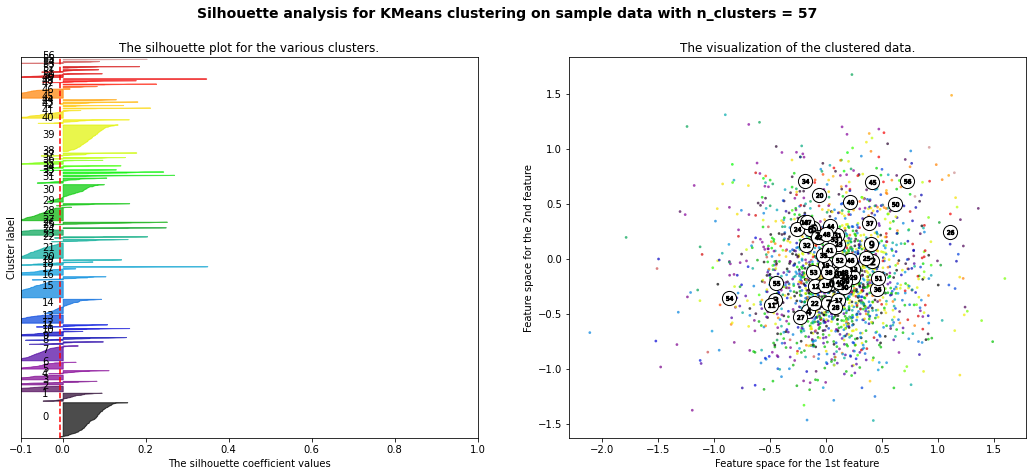

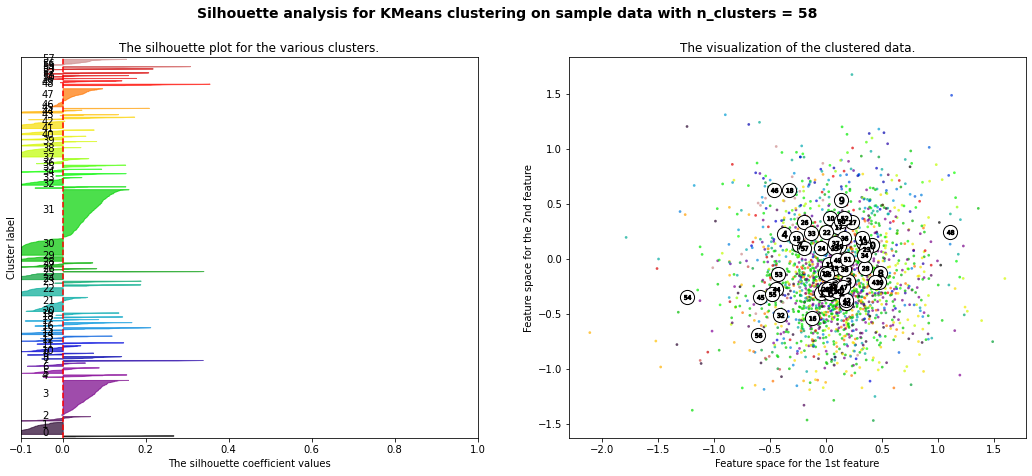

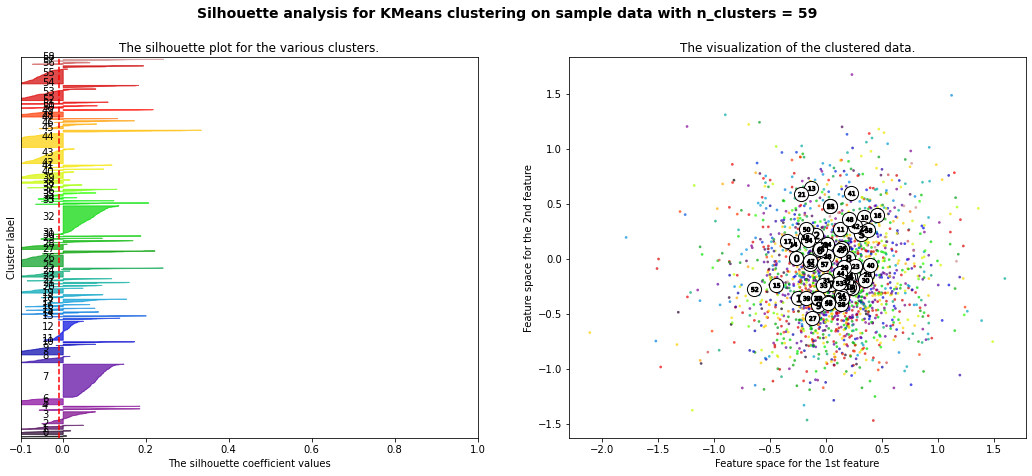

In [53]:
silhouette_analysis(np.array(suggestion_terms_vectors),2,60)

### Perform K-Means Clustering with the optimal number of clusters determined by the Silhouette Analysis

In [56]:
input_vector = np.array(suggestion_terms_vectors) # Vector file input (e.g. glove.6B.300d.txt)
input_label = suggestions
df, labels_array = build_word_vector_matrix(input_vector, input_label, len(input_label))

In [60]:
kmeans_model = KMeans(init='k-means++', n_clusters=16, n_init=1,max_iter=200)
kmeans_model.fit(df)
labels = kmeans_model.labels_
suggestion_clusters_df=pd.DataFrame(list(zip(suggestions,suggestion_terms_vectors, labels)),columns=['title', 'vector', 'cluster'])

### Show Clusters and corresponding terms

In [61]:
for i in sorted(suggestion_clusters_df.cluster.unique()):
    print('Cluster ',i,': ',suggestion_clusters_df[suggestion_clusters_df.cluster == i].title.to_list())

Cluster  0 :  ['band', 'percussion', 'drummer', 'dub', 'trio', 'rap', 'songs', 'conductor', 'label', 'eurovision', 'songwriter', 'artist', 'demo', 'musical', 'tenor', 'bassist', 'disco', 'duo', 'guitarist', 'singer', 'composer', 'studio', 'organ', 'pianist', 'album', 'rapper']
Cluster  1 :  ['stuttgarter', 'münchen', 'literatur', 'abitur', 'tagesspiegel', 'messe', 'freiheit', 'münster', 'oberstleutnant', 'verlag', 'welle', 'brücke', 'wechsel', 'eis', 'oberleutnant', 'rundschau', 'prenzlauer', 'folkwang', 'kunst', 'werke', 'königsberg', 'polizei', 'autobahn', 'kempten', 'frauen', 'stalingrad', 'haus', 'volksoper', 'berghof', 'kurier', 'licht', 'presse', 'gruppe', 'preis', 'hochschule', 'berchtesgaden', 'klagenfurt', 'platz', 'volksbühne', 'philosophie', 'börse', 'nürburgring', 'zeitung', 'luftwaffe', 'staatstheater', 'sprache', 'arbeit', 'zeitschrift', 'spektrum', 'göttingen', 'institut', 'salzgitter', 'schauspielhaus', 'lokomotive', 'jugend', 'bild', 'stiftung', 'oberhof', 'werden', 'l

### Save k-means clusters to file

In [62]:
suggestion_clusters_df.to_csv('./kmeans_clustering.csv')

## Plot Clusters

In [67]:
suggestion_clusters_df = pd.read_csv('./kmeans_clustering.csv')

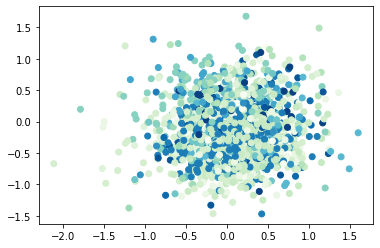

In [64]:
suggestion_clusters_df = pd.read_csv('./kmeans_clustering.csv')
suggestions_vectors = np.array([np.array([float(x) for x in vector]) for vector in suggestion_clusters_df.vector.to_list()])

#centers
c = [n for n in range(1,61)]
plt.scatter(suggestions_vectors[:,0],suggestions_vectors[:,1], c=suggestion_clusters_df.cluster.to_list(),cmap='GnBu')
plt.savefig('./kmeans_clusters.png')

## Reorder and optimize clusters manually and add labels

In [68]:
cluster_df = pd.DataFrame(columns=['cluster_label','cluster_terms'])

In [75]:
cluster_df.at[0,'cluster_label'] = 'geografisch'
cluster_df.at[0,'cluster_terms'] =['wiedenbrück', 'königswinter','rheinhausen', 'mayrhofen', 'hohenschönhausen', 'wümme', 'erzgebirge', 
                                          'travemünde', 'neumünster', 'bremervörde', 'göppingen', 'fuhlsbüttel', 'eimsbüttel', 'dorotheum',
                                   'bozen', 'moabit', 'salzuflen', 'süd', 'eichsfeld', 'echterdingen', 'alsenz', 'döbeln', 'brunsbüttel', 
                                   'nordstrand', 'küsnacht','marzahn', 'kempten', 'stalingrad', 'prenzlauer', 'brandenburger', 'müden', 'folkwang', 'glückstadt', 'volkskammer',
                                   'lüdenscheid', 'ahrweiler','eisenhüttenstadt', 'berchtesgaden', 'klagenfurt', 'uckermark', 'brocken',
                                   'nürburgring','kürten', 'saalekreis','stadelhofen', 'königstein', 'oderbruch', 'salzgitter','oberhof', 
                                   'mühlacker', 'osterholz', 'anhalt', 'vorpommern', 'eckernförde', 'schwäbisch', 'lechfeld', 'thomanerchor',
                                   'kremsmünster','glashütte', 'feuerbach','wangerooge', 'saarbrücken', 'schwaben','württemberg',
                                   'alexanderplatz', 'niedersachsen', 'saale', 'königssee', 'ostholstein','lübbecke', 'vogelsberg',
                                   'brauweiler', 'saarland', 'lenzerheide','landquart','höxter', 'hafencity', 'tilsit', 'amrum','düren', 
                                   'zugspitze', 'wolfenbüttel', 'steiermark','schönebeck', 'burgenlandkreis', 'harz', 'tempelhof', 'beuthen',
                                   'osnabrück','oberbayern', 'neumarkt', 'hofheim', 'quakenbrück', 'fürstenwalde', 'dülmen', 'osterode',
                                   'altmark', 'furtwangen', 'zweibrücken', 'hohenzollern', 'eisleben', 'gendarmenmarkt', 'kopenhagen', 
                                   'völklingen','blankenese', 'küssnacht', 'wattenscheid', 'altmarkkreis', 'mittelrhein', 'bürgenstock',
                                   'schwenningen','kyffhäuser','pommern','hoppegarten','weinstadt','münchen','münster','königsberg',
                                   'göttingen','ludwigshafen','büsum','manderscheid','kranzberg','schönfeld','blaustein','brücken',
                                   'neuenstadt', 'hindelang','klingenberg','buchheim','westendorf','fallersleben','blankenstein','hoffenheim',
                                   'bayern','überlingen','lauffen','berghof','westpark','ostfriesland','lindenhof','thüringen','frankfurt',
                                   'stalingrad','delbrück',
                                
                                  ]

cluster_df.at[1,'cluster_label'] = 'unternehmen_marken'
cluster_df.at[1,'cluster_terms']= ['bauhaus','prosieben','sparkasse','vorwerk','meininger','jägermeister', 'liebeskind','malteser',
                                   'meiler','evonik','spielvogel','raiffeisenbank','blaupunkt','gmbh', 'airbus','telekom', 
                                   'vattenfall', 'volkswagen','hypovereinsbank', 'postbank','benz','pfizer', 'raiffeisen',
                                   'commerzbank','allianz', 'sulzer','fresenius','volksbank', 'sennheiser','primark','firma',
                                   'tupperware','esprit','birkenstock','voigt','schwarzkopf','deichmann','ratiopharm']

cluster_df.at[2,'cluster_label'] = 'sport_hobbies'
cluster_df.at[2,'cluster_terms']= ['angeln','poker','liga','club', 'league', 'coach','knockout', 'football', 'team', 'regionalliga','training',
                                  'landsmannschaft','fußball','duell','shooter', 'floorball', 'basketball', 'bodybuilding', 'handballer', 
                                   'bodybuilder', 'referee', 'softball', 'golfer', 'footballer', 'volleyball', 'tennis', 'wrestler', 'boxer', 
                                   'handball','bundesliga', 'eintracht', 'goalkeeper','sport','ball','baseball','box','fighter','sponsor','spiel',
                                   'stürmer','stadion','olympiastadion','turnier','paintball','reiten','hobby','reiter','baden','schwimmer',
                                  'motorsport','lauf',]

cluster_df.at[3,'cluster_label'] = 'nachrichten'
cluster_df.at[3,'cluster_terms']= ['kicker','stuttgarter','tagesspiegel','verlag', 'welle', 'rundschau','presse',
                                  'zeitung', 'zeitschrift','bild','wirtschaftswoche','kurier', 'österreichische', 'rundfunk', 'welt',
                                  'handelsblatt', 'spiegel', 'anzeiger','weltwoche','bunte','tagblatt','abendblatt','maz']

cluster_df.at[4,'cluster_label'] = 'militaer_polizei'
cluster_df.at[4,'cluster_terms']= ['oberstleutnant', 'oberleutnant', 'panzer', 'luftwaffe', 'kapitänleutnant', 
                                   'sturmbannführer', 'obersturmbannführer', 'generalmajor', 'oberst', 'waffen', 'admiral',
                                   'gewehr','kompanie','einheit','sturmgewehr','flotte','tatort',
                                   'armee','wache','widerstand','schütze','kaliber','uniform','polizei', 'kommissar',
                                   'general','soldat','commander','lka','kavallerie', 'razzia',]

cluster_df.at[5,'cluster_label'] = 'technologie_medien'
cluster_df.at[5,'cluster_terms']= ['information','laptop', 'browser', 'javascript', 'internet', 'twitter', 'microsoft', 
                                   'linkedin', 'newsletter', 'homepage', 'ticketmaster', 'computer', 'youtube', 'website', 
                                   'software', 'podcast','technologies','mobilfunk','elektronik','antenne','informatik', 'iot',
                                   'grafik', 'programm','pinterest','minecraft','github','gamescom','net','rechner','tinder','handy',
                                   'gigabyte', 'reboot','freenet','port', 'soap','code','reddit','telefon','elektro']

cluster_df.at[6,'cluster_label'] = 'kunst_kultur'
cluster_df.at[6,'cluster_terms']= ['live', 'radio', 'broadcast', 'songs', 'cds', 'release', 'film', 'show', 'audio', 'video',
                                   'label', 'dvd', 'videos', 'demo', 'musical', 'single', 'animation', 'entertainment', 
                                   'version', 'movie', 'playlist', 'comic', 'studio', 'bonus', 'plus', 'album', 'clip',
                                   'band', 'percussion', 'drummer', 'trio', 'rap', 'songwriter', 'artist', 'tenor', 
                                   'bassist', 'duo', 'singer', 'organ', 'pianist', 'organist', 'rapper','instrument','collage',
                                   'volksoper','volksbühne', 'staatstheater','kabarett','bücher','stadthalle','filmproduktion',
                                   'schauspielhaus', 'kunsthalle','kunst', 'werke','philharmonie', 'akademie', 'oper', 
                                   'orchester', 'staatsoper','musik','galerie','musiker','orgel', 'maler','kunst', 'werke',
                                   'disco','theater','atelier', 'filme', 'papier','foto','dramaturg','ticket', 'poster', 
                                   'slogan','event', 'fan', 'logo','sommelier','boogie','literatur','bilder','bild','lieder',
                                   'kultur','künstler','statue','eurovision','design','gesang','kamera','illustrator', 'writer',
                                   'kino','buch','ballett','oktoberfest','comeback','journalist','gedicht','bibliothek','keramik',
                                   'staatsbibliothek','schlager','klavier','popstar','alben','lied','museum','regie','autor','tournee',
                                   'ruhm','bühne'
                                   
                                  ]

cluster_df.at[7,'cluster_label'] = 'bildung'
cluster_df.at[7,'cluster_terms']= ['schüler','gesamtschule','realschule','oberschule','student', 'kindergarten','abitur',  
                                   'hochschule', 'institut','schule','semester', 'gymnasium','seminar','kurs','bildung',
                                   'fach', 'studium','dissertation','tafel', 'universität','grundschule','fachhochschule',
                                   'auditorium', 'promotion', 'lehrer','studenten']

cluster_df.at[8,'cluster_label'] = 'wissenschaft_forschung'
cluster_df.at[8,'cluster_terms'] = ['fraunhofer','biologie','chemie','forschung','förderung','professor', 'psychologist',
                                    'philosophie','mathematik','evolution','fossil','labor','wissenschaft', 'physik','symposium',
                                    'studie'
                                   ]

cluster_df.at[9,'cluster_label'] = 'mode_aussehen'
cluster_df.at[9,'cluster_terms'] = ['haar','jacke','schuh','pumps','outfit','trend','mode','stylist','overall','designer',
                                    'hairstylist','ring', 'pullover','sneaker','hoodie','psychologie','armband','hut',]

cluster_df.at[10,'cluster_label'] = 'privatleben'
cluster_df.at[10,'cluster_terms'] = ['ehe','oma','schwester','bruder','sohn','frau','frauen','gender','vater','mutter','kind',
                                    'revolution','adoption','familie','studentenverbindung','liebe','erbe','mann','zwilling',
                                    'razzia','burschenschaft','onkel','mother','brüder']

cluster_df.at[11,'cluster_label'] = 'transport'
cluster_df.at[11,'cluster_terms'] = ['taxi', 'trailer', 'route', 'shuttle', 'depot', 'pilot', 'truck', 'limousine', 
                                     'caravan', 'garage', 'yacht', 'bike', 'airport', 'chauffeur', 'scooter', 'bus', 
                                     'tunnel','autobahn','traktor','straßenbahn','motorrad','copilot','import','boot','tour',
                                    'transport','flughafen','bahnhof','helikopter','straße','verkehr','strecke','schiff',
                                    'trabant','oldtimer','lokomotive','eisenbahn','kanu', 'speedster','bahn','airline','tanker',
                                    'automobile','auto','kapitän','veteran']

cluster_df.at[12,'cluster_label'] = 'politik'
cluster_df.at[12,'cluster_terms'] = ['reichstag','landkreis','rathaus', 'oberbürgermeister','bürgermeister', 'mittelstand',
                                     'reichsbanner','bundesamt','bundesministerium', 'präsident', 'staatsrat', 
                                     'fahne','verfassungsschutz','abgeordnetenhaus','gemeinderat', 'grundgesetz','amtsgericht',
                                     'bundesland','wahlkreis', 'ministerpräsident', 'stimmen','arbeiterpartei','bundesrepublik',
                                     'parlament','kommission','machtergreifung','senat','landrat','liberale', 
                                     'bundesverband','bürgerschaft','bewegung','kanzler','wahl','stimme','republikaner',
                                     'bündnis','bund', 'stadt','lobbyist','diplomat','reform', 'land', 'opposition',
                                     'demonstration', 'lobby','nation','partei','politik','nationalrat','volk','ngo','putsch'
                                    ]

cluster_df.at[13,'cluster_label'] = 'wirtschaft'
cluster_df.at[13,'cluster_terms']= ['bank', 'consulting','financial','fund', 'investor', 'partner', 'stock', 'banknote',
                                   'investment', 'börse','wirtschaft','euro','geld','handel','markt','inflation','steuer',
                                   'kredit']

cluster_df.at[14,'cluster_label'] = 'speisen'
cluster_df.at[14,'cluster_terms']= ['brasserie', 'torte', 'kaffee','humus', 'eis', 'bonbon','bratwurst','currywurst','fleisch',
                                    'bio','steak','essig','gin','restaurant', 'biergarten','steakhouse','wein','tomate','bier',
                                   'lebkuchen','sauerkraut', 'latte', 'bartender','reis','honig', 'kochen','weingut','banane',
                                   'brei','brauerei','milch']

cluster_df.at[15,'cluster_label'] = 'gesundheit_koerper'
cluster_df.at[15,'cluster_terms'] = ['ellenbogen','droge','reflex','brust','maske', 'raucher', 'grippe','bein','praxis',
                                     'krankenhaus','diagnose','syndrome','psychiatrie','mund','ärzte', 'doktor','blut',
                                     'dentist','internist','operation','fuß','haut', 'apotheker','gesundheit','chirurgie',
                                     'medizin', 'auge','tourette', 'kopf','klinik','reha','herz','bauch','ohr','alzheimer',
                                    'brille', 'arzt', 'skin','pharma','defibrillator']

cluster_df.at[16,'cluster_label'] = 'recht'
cluster_df.at[16,'cluster_terms'] = ['gericht','gesetz','mandat','jura','recht','staatsexamen','strafe','jurist','notar',
                                     'landgericht', 'patent','rechte','olg','exam']

cluster_df.at[17,'cluster_label'] = 'terror'
cluster_df.at[17,'cluster_terms'] = ['explosion','zerstörer','bombe','terrorist','gewalt','opfer']

cluster_df.at[18,'cluster_label'] = 'religion_glauben'
cluster_df.at[18,'cluster_terms'] = ['reformist','kirche','kloster','islamist','moslem','muslim','evangelist','theologie',
                                     'pastor', 'küster', 'priester','ritual','bischof','bibel','kreuz','gott','religion']

cluster_df.at[19,'cluster_terms'] = [suggestion for suggestion in suggestion_clusters_df.title.to_list() if suggestion not in [term for cluster in cluster_df.cluster_terms.to_list() for term in cluster]]
cluster_df.at[19,'cluster_label'] = 'sonstige'

### Save manual clusters to file

In [76]:
cluster_df.to_csv('./manual_clustering.csv')

In [77]:
cluster_df.head(3)

cluster_label                                      cluster_terms
0         geografisch  [wiedenbrück, königswinter, rheinhausen, mayrh...
1  unternehmen_marken  [bauhaus, prosieben, sparkasse, vorwerk, meini...
2       sport_hobbies  [angeln, poker, liga, club, league, coach, kno...